<a href="https://colab.research.google.com/github/EnochYounceSAIC/colab/blob/main/BPSK%20practice" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Frankestein encoding

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import binascii

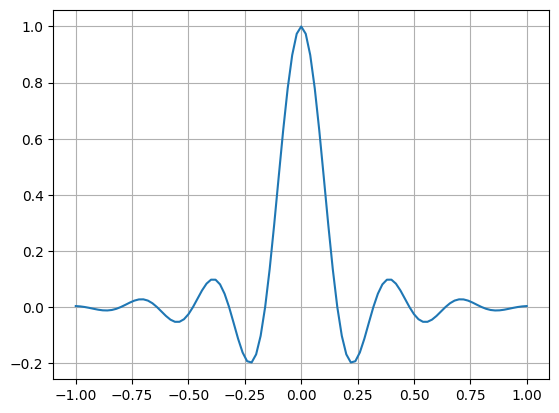

In [3]:
# Create our raised-cosine filter   code found here :https://pysdr.org/content/pulse_shaping.html
sps = 8
num_taps = 101
beta = 0.21
Ts = sps/50 # Assume sample rate is 1 Hz, so sample period is 1, so *symbol* period is 8
t = (np.arange(num_taps) - (num_taps-1)//2)/50
h = np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)
plt.figure(1)
plt.plot(t, h)
plt.grid(True)
plt.show()

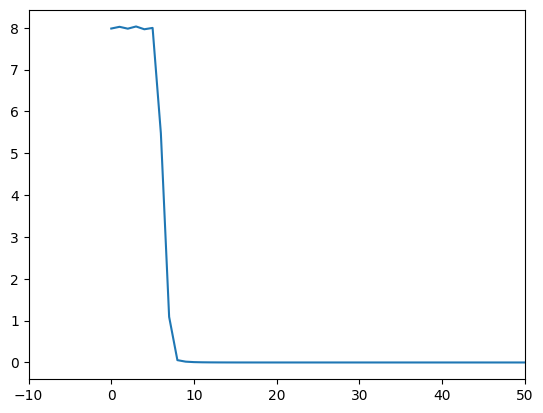

In [4]:
y = sp.fft.fft(h)
plt.plot(np.abs(y))
plt.xlim(-10,50)
plt.show()

In [5]:
f = open("Frankenstein.txt")
text = f.read()
f.close()
bin = ''.join(format(ord(i), '08b') for i in text)
print(str(bin[0:96]))
print(str(len(bin)) + " total bits")
print(text[0:12])
bin = np.array([int(i) for i in bin[0:50000]])

010001100111001001100001011011100110101101100101011011100111001101110100011001010110100101101110
3356412 total bits
Frankenstein


[ 0.          1.00002     2.00004     3.00006     4.00008     5.0001
  6.00012     7.00014     8.00016     9.00018    10.0002     11.00022
 12.00024    13.00026001 14.00028001 15.00030001 16.00032001 17.00034001
 18.00036001 19.00038001 20.00040001 21.00042001 22.00044001 23.00046001
 24.00048001 25.00050001 26.00052001 27.00054001 28.00056001 29.00058001
 30.00060001 31.00062001 32.00064001 33.00066001 34.00068001 35.00070001
 36.00072001 37.00074001 38.00076002 39.00078002 40.00080002 41.00082002
 42.00084002 43.00086002 44.00088002 45.00090002 46.00092002 47.00094002
 48.00096002 49.00098002 50.00100002 51.00102002 52.00104002 53.00106002
 54.00108002 55.00110002 56.00112002 57.00114002 58.00116002 59.00118002
 60.00120002 61.00122002 62.00124002 63.00126003 64.00128003 65.00130003
 66.00132003 67.00134003 68.00136003 69.00138003 70.00140003 71.00142003
 72.00144003 73.00146003 74.00148003 75.00150003 76.00152003 77.00154003
 78.00156003 79.00158003 80.00160003 81.00162003 82.001640

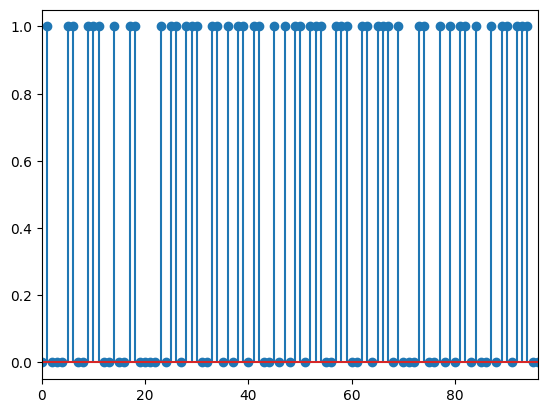

In [6]:
f = 1000
t = np.linspace(0,len(bin),f*50)
print(t[0:100])
print(bin[0:96])
plt.stem(t,bin)
plt.xlim(0,96)
plt.show()

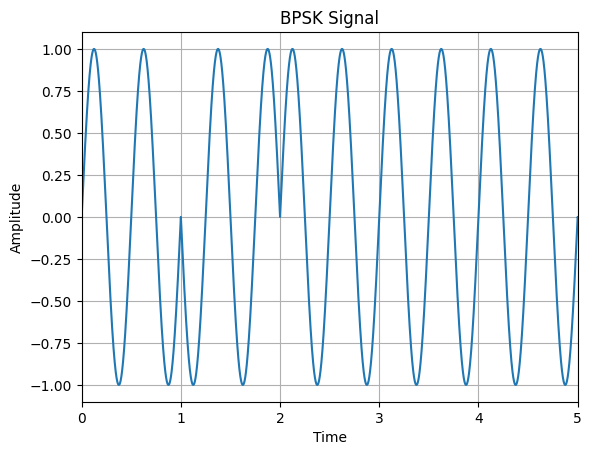

In [22]:
fs = 100000 # High sampling rate
t = np.arange(0, 50, 1/fs) # Time array for the BPSK signal

# Calculate indices directly, assuming 1 symbol per unit of time in the plot
indices = (t).astype(int)

# Ensure indices are within the bounds of bin
indices = indices[indices < len(bin)]
t = t[:len(indices)] # Truncate t to match the length of valid indices

# Calculate BPSK using the valid indices
BPSK = np.sin(2*np.pi*(2)*t + np.pi * bin[indices]) # Corrected phase for BPSK



plt.plot(t,BPSK)
plt.xlim(0, 5) # Show the first few symbols (assuming 1 symbol per unit of time)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("BPSK Signal")
plt.grid(True)
plt.show()

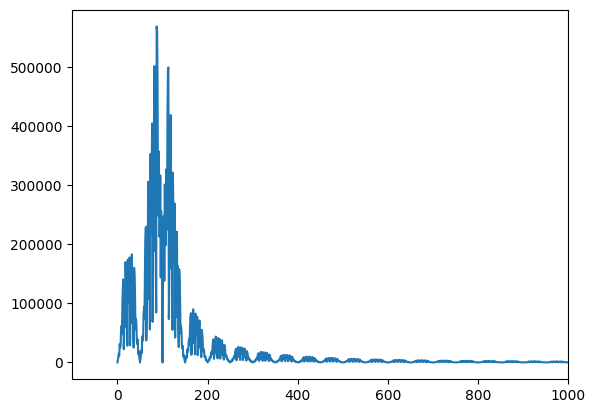

In [26]:
BPSK_fft = sp.fft.fft(BPSK)
plt.plot(np.abs(BPSK_fft))
plt.xlim(-100,1000)
plt.show()
